In [1]:
!pip install librosa


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Concatenate

from sklearn.preprocessing import StandardScaler

### Image Preprocessing

In [53]:
import tensorflow as tf
from efficientnet_pytorch import EfficientNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D
from transformers import BertModel, BertTokenizer


/Users/preethiprakash/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
dataset = pd.read_csv("localDataset.csv")

!ls

# Sound

In [28]:
features = []
for index, row in dataset.iterrows():
    print(index)
    track = row["track"]
    track = track.replace(" ", "")
    
    artist = row["artist"]
    artist = artist.replace(" ", "")
    
    title = track + "-" + artist
    
    audio_path = os.path.join("audio", title + ".wav")
    
    y, sr = librosa.load(audio_path)

    # Mel-frequency Cepstral coefficients
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    # Chroma features
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    # Spectral centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    # Spectral bandwith
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    # Spectral contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    # Spectral rolloff
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    # Zero crossing rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))

    features.append(np.hstack([mfccs, chroma, spectral_centroid, spectral_bandwidth, 
                          spectral_contrast, spectral_rolloff, tempo, zero_crossing_rate]))
    
    
mfcc_headers = [f'mfcc_{i}' for i in range(13)]
chroma_headers = [f'chroma_{i}' for i in range(12)]

columns = []
columns.extend(mfcc_headers)
columns.extend(chroma_headers)
columns.extend(['spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_rolloff',
              'tempo', 'zero_crossing_rate'])

feature_df = pd.DataFrame(features, columns=columns)

feature_df.to_csv('sound_features.csv', index=False)


0
1
2
3
4
5
6
7
8
9


In [31]:
X_sound = pd.read_csv("sound_features.csv")

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_8,chroma_9,chroma_10,chroma_11,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,tempo,zero_crossing_rate
0,-130.697006,102.002975,5.189391,34.408699,-0.862122,6.955172,-3.533127,-0.618529,-0.565193,-0.056102,...,0.401030,0.335639,0.353206,0.356800,2055.057362,2229.281495,23.044797,4264.535012,117.453835,0.101870
1,-70.469986,59.635769,17.496099,30.985106,6.338585,16.035362,-3.421890,10.049198,0.923836,5.648692,...,0.322987,0.392745,0.330386,0.344434,2916.027581,2801.474195,23.160013,6306.239170,92.285156,0.124150
2,-161.017715,122.237129,-1.667263,33.997589,-1.533162,-1.990508,-9.392287,-3.942397,-14.499628,-1.645951,...,0.262122,0.423114,0.312366,0.206316,1565.310458,1918.442049,24.709805,3137.844143,69.837416,0.065932
3,-129.254150,83.046524,8.802644,30.393484,-2.339391,15.614232,5.623178,14.853094,-4.141773,5.801558,...,0.367964,0.435787,0.410363,0.465882,2293.378332,2478.987005,22.406514,5151.336862,99.384014,0.084255
4,-170.932617,95.124054,-20.394737,14.234807,1.584227,11.071122,6.128368,5.488183,-0.243983,7.413478,...,0.346893,0.326555,0.330543,0.464940,2237.222887,2310.364556,22.373451,4459.732359,184.570312,0.110913
5,-194.474228,112.042038,-8.235359,19.941103,7.606197,5.098617,-1.460285,3.629792,-4.189184,3.045815,...,0.256891,0.387044,0.268809,0.284809,1823.630691,2095.633117,24.171692,3666.618290,117.453835,0.078748
6,-57.828110,86.327438,-16.996964,32.463596,2.304313,-3.773565,-4.851893,-0.183042,-7.837971,5.972918,...,0.306521,0.315161,0.299107,0.374546,2398.783054,2355.415232,22.685596,4745.853292,129.199219,0.122506
7,-73.352486,99.607819,-12.535102,28.799826,12.808491,0.640644,-1.144058,-1.046076,-4.180705,4.305996,...,0.503851,0.611787,0.351498,0.361331,2098.647561,2336.723246,23.821783,4415.287098,143.554688,0.088132
8,-122.373825,100.637589,27.382858,39.472027,5.394733,5.027365,-4.426888,4.230237,-1.364608,3.883588,...,0.333225,0.283197,0.274472,0.361558,1901.306598,2429.685576,22.271371,4368.362867,95.703125,0.059478
9,-109.061630,57.507122,-18.172764,30.934362,1.252246,10.899601,-0.458750,6.320355,-1.892711,6.273921,...,0.371318,0.450948,0.379659,0.416422,2994.455113,2509.105147,22.044901,5766.438848,123.046875,0.174921


In [33]:
# Normalize sound features
scaler = StandardScaler()
X_sound = scaler.fit_transform(X_sound)

In [34]:
display(pd.DataFrame(X_sound))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.202878,0.515301,0.459753,0.697624,-0.913498,0.060562,-0.411618,-0.835871,0.749476,-1.494821,...,0.790098,-0.678265,0.522335,-0.093082,-0.402928,-0.514431,-0.028439,-0.411318,0.006812,0.024097
1,1.193414,-1.627991,1.256379,0.204731,0.684019,1.444446,-0.386724,1.147143,1.094557,0.574748,...,-0.357100,-0.038677,-0.015428,-0.259806,1.598570,1.996483,0.106984,1.897765,-0.829588,0.713090
2,-0.905827,1.538915,0.015915,0.638436,-1.062372,-1.302822,-1.722795,-1.453742,-2.479817,-2.071581,...,-1.251778,0.301463,-0.440069,-2.122014,-1.541442,-1.878466,1.928582,-1.685559,-1.575566,-1.087276
3,-0.169427,-0.443677,0.693643,0.119556,-1.241239,1.380262,1.637404,2.040135,-0.079393,0.630204,...,0.304042,0.443405,1.869250,1.377639,0.151097,0.581335,-0.778665,0.591618,-0.593680,-0.520617
4,-1.135693,0.167307,-1.196335,-2.206799,-0.370762,0.687861,1.750456,0.299300,0.823917,1.214972,...,-0.005696,-0.780005,-0.011743,1.364940,0.020552,-0.158620,-0.817527,-0.190558,2.237212,0.303757
5,-1.681477,1.023161,-0.409245,-1.385267,0.965246,-0.222390,0.052248,-0.046154,-0.090380,-0.369516,...,-1.328673,-0.102525,-1.466517,-1.063719,-0.940925,-1.100911,1.296093,-1.087537,0.006812,-0.690926
6,1.486501,-0.277701,-0.976393,0.417588,-0.211007,-1.574572,-0.706734,-0.754919,-0.935983,0.692370,...,-0.599137,-0.907621,-0.752524,0.146183,0.396131,0.039073,-0.450637,0.133033,0.397132,0.662258
7,1.126587,0.394133,-0.687572,-0.109882,2.119404,-0.901816,0.123014,-0.915347,-0.088415,0.087649,...,2.301508,2.414632,0.482065,-0.031996,-0.301594,-0.042952,0.884817,-0.240824,0.874190,-0.400727
8,-0.009915,0.446228,1.896360,1.426588,0.474621,-0.233250,-0.611626,0.065462,0.564213,-0.065591,...,-0.206599,-1.265622,-1.333065,-0.028930,-0.760352,0.364988,-0.937510,-0.293893,-0.716003,-1.286842
9,0.298713,-1.735676,-1.052504,0.197426,-0.444414,0.661720,0.276374,0.453992,0.441825,0.801567,...,0.353335,0.613215,1.145696,0.710784,1.780890,0.713500,-1.203698,1.287273,0.192679,2.283185


# Album covers

In [37]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    # Performs standardization and normalization
    img_array = preprocess_input(img_array)
    return img_array

In [39]:
X_image_album_cover = []
for index, row in dataset.iterrows():
    print(index)
    track = row["track"]
    
    artist = row["artist"]
    
    title = track + "_" + artist
    
    album_path = os.path.join("covers", title + ".jpg")
    X_image_album_cover.append(preprocess_image(album_path))
    
    
X_image_album_cover = np.array(X_image_album_cover)
    

0
1
2
3
4
5
6
7
8
9


# Spectrograms

In [41]:
X_image_spectogram = []
for index, row in dataset.iterrows():
    print(index)
    track = row["track"]
    track = track.replace(" ", "")
    
    artist = row["artist"]
    artist = artist.replace(" ", "")
    
    title = track + "-" + artist
    
    spectogram_path = os.path.join("spec", title + ".jpg")
    X_image_spectogram.append(preprocess_image(spectogram_path))
    
    
X_image_spectogram = np.array(X_image_spectogram)
    

0
1
2
3
4
5
6
7
8
9


# Lyrics

In [42]:
X_lyrics = []
for index, row in dataset.iterrows():
    print(index)
    track = row["track"]
    track = track.replace(" ", "")
    
    artist = row["artist"]
    artist = artist.replace(" ", "")
    
    title = track + "-" + artist
    
    lyrics_path = os.path.join("lyrics", title + ".txt")
    with open(lyrics_path, "r") as file:
        file_contents = file.read()
        X_lyrics.append(file_contents)

X_lyrics = np.array(X_lyrics)

0
1
2
3
4
5
6
7
8
9


In [35]:
num_columns_X_sound = X_sound.shape[1]

In [36]:
num_genres = 3

In [73]:
y_genre = []
y_popularity = []
y_danceability =[]
y_energy = []

In [74]:
for index, row in dataset.iterrows():
    y_popularity.append(row["popularity"])
    y_genre.append((row["genre"]))
    y_danceability.append(row["danceability"])
    y_energy.append(row["energy"])


In [75]:
y_genre = np.array(y_genre)
y_popularity = np.array(y_popularity)
y_danceability = np.array(y_danceability)
y_energy = np.array(y_energy)

In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_genre = label_encoder.fit_transform(y_genre)

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim

# TODO: Add text and image modality models
# SoundModalityModel creates the sound embeddings based on the SLP features
class SoundModalityModel(nn.Module):
    def __init__(self, num_columns_X_sound):
        super(SoundModalityModel, self).__init__()
        self.sound_embedding = nn.Sequential(
            nn.Linear(num_columns_X_sound, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
            nn.ReLU()
        )

    def forward(self, input_sound):
        sound_embedding = self.sound_embedding(input_sound)
        return sound_embedding
    
    
class ImageModalityModel(nn.Module):
    def __init__(self, embedding_size=8):
        super(ImageModalityModel, self).__init__()
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b0')
        
        # Freeze all parameters of EfficientNet
        for param in self.efficientnet.parameters():
            param.requires_grad = False
        
        # Replace the final fully connected layer with a new one
        self.efficientnet._fc = nn.Linear(self.efficientnet._fc.in_features, embedding_size)

    def forward(self, input_image):
        # Forward pass through EfficientNet
        output = self.efficientnet(input_image)
        return output

# TODO: Fix BERT Model {?}

class TextModalityModel(nn.Module):
    def __init__(self, embedding_size=8, freeze_bert=True):
        super(TextModalityModel, self).__init__()
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        # Freeze the BERT weights if freeze_bert is True
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
        # Maps to size 8 embedding
        self.fc = nn.Linear(self.bert.config.hidden_size, embedding_size)

    def forward(self, input_text):
        # Tokenize input_text
        inputs = self.tokenizer(input_text.tolist(), return_tensors="pt", padding=True, truncation=True)
        
        # Forward pass through BERT
        outputs = self.bert(**inputs)
        
        # Extract the last hidden states
        last_hidden_states = outputs.last_hidden_state
        
        # Take the mean of the last hidden states (reduce it to 1 dimension)
        mean_last_hidden_state = torch.mean(last_hidden_states, dim=1)
        
        # Pass the mean last hidden states through the fully connected layer (maps to size 8 embedding)
        output = self.fc(mean_last_hidden_state)
        
        return output

    
# Overall model that combines the embeddings from the three modalities and produces 4 outputs
# Separate fully connected layers for genre, popularity, danceability, and energy
class OverallModel(nn.Module):
    def __init__(self, num_modalities, num_genres):
        super(OverallModel, self).__init__()
        self.concatenated_output_size = 8 * num_modalities
        self.fc1 = nn.Linear(self.concatenated_output_size, 64)
        self.fc2_genre = nn.Linear(64, num_genres)
        self.fc3_popularity = nn.Linear(64, 1)
        self.fc4_danceability = nn.Linear(64, 1)
        self.fc5_energy = nn.Linear(64, 1)

    def forward(self, sound_embedding, album_embedding, spec_embedding, text_embedding):
        # TODO: Concatenate with text and image embeddings
        concatenated_embedding = torch.cat((sound_embedding, album_embedding, spec_embedding, text_embedding), dim=1)
        x = torch.relu(self.fc1(concatenated_embedding))
        genre_output = torch.softmax(self.fc2_genre(x), dim=-1)
        popularity_output = torch.sigmoid(self.fc3_popularity(x))
        danceability_output = torch.sigmoid(self.fc4_danceability(x))
        energy_output = torch.sigmoid(self.fc5_energy(x))
        return genre_output, popularity_output, danceability_output, energy_output

num_modalities = 4 # TODO: Change to 3 once we have text and image modalities
num_genres = 3 

#TODO: Instantiate the remaining modality models
sound_model = SoundModalityModel(num_columns_X_sound)
album_model = ImageModalityModel()
spec_model = ImageModalityModel()
text_model = TextModalityModel()

overall_model = OverallModel(num_modalities, num_genres)

# TODO: Create optimizers for text and image modalities
# Create optimizers for each of our models (modality models as well as genre, popularity, danceability, energy)
optimizer_sound = optim.Adam(sound_model.parameters())
# optimizer_album = optim.Adam(album_model.parameters())
# optimizer_spec = optim.Adam(spec_model.parameters())

optimizer_genre = optim.Adam(overall_model.fc2_genre.parameters())
optimizer_popularity = optim.Adam(overall_model.fc3_popularity.parameters())
optimizer_danceability = optim.Adam(overall_model.fc4_danceability.parameters())
optimizer_energy = optim.Adam(overall_model.fc5_energy.parameters())

# Define the criteria
criterion_genre = nn.CrossEntropyLoss()
criterion_popularity = nn.MSELoss()
criterion_danceability = nn.MSELoss()
criterion_energy = nn.MSELoss()

# TODO: Form input data for text and image features
# Compile our datasets
X_sound = torch.tensor(X_sound, dtype=torch.float32).clone().detach()
X_album = torch.tensor(X_image_album_cover, dtype=torch.float32).clone().detach()
X_spec = torch.tensor(X_image_spectogram, dtype=torch.float32).clone().detach()

y_genre = torch.randint(0, num_genres, (10,))
y_popularity = torch.randn(10, 1) 
y_danceability = torch.randn(10, 1)
y_energy = torch.randn(10, 1)

# Define basic parameters before training
num_epochs = 100
batch_size = 4
num_samples = 10
num_batches = num_samples // batch_size

losses_genre = []
losses_popularity = []
losses_danceability = []
losses_energy = []

# Training loop
for epoch in range(num_epochs):
    for batch in range(num_batches):
        start = batch * batch_size
        end = min(start + batch_size, num_samples)
        
        # Get data for this batch
        batch_X_sound = X_sound[start:end]
        batch_X_album = X_album[start:end]
        batch_X_album = batch_X_album.permute(0, 3, 1, 2)
        batch_X_spec = X_spec[start:end]
        batch_X_spec = batch_X_spec.permute(0, 3, 1, 2)
        
        batch_X_lyric = X_lyrics[start:end]

        batch_y_genre = y_genre[start:end]
        batch_y_popularity = y_popularity[start:end]
        batch_y_danceability = y_danceability[start:end]
        batch_y_energy = y_energy[start:end]

        # Zero the gradients
        optimizer_sound.zero_grad()
#         optimizer_album.zero_grad()
#         optimizer_spec.zero_grad()


        optimizer_genre.zero_grad()
        optimizer_popularity.zero_grad()
        optimizer_danceability.zero_grad()
        optimizer_energy.zero_grad()
        
        # TODO: Create embeddings for text and image
        # Retrieve the four outputs given our embeddings
        sound_embedding = sound_model(batch_X_sound)
        album_embedding = album_model(batch_X_album)
        spec_embedding = spec_model(batch_X_spec)
        text_embedding = text_model(batch_X_lyric)

        
        genre_output, popularity_output, danceability_output, energy_output = overall_model(sound_embedding, 
                                                                                            album_embedding, 
                                                                                            spec_embedding, 
                                                                                           text_embedding)
        
        # Calculate individual losses
        loss_genre = criterion_genre(genre_output, batch_y_genre)
        loss_popularity = criterion_popularity(popularity_output, batch_y_popularity)
        loss_danceability = criterion_danceability(danceability_output, batch_y_danceability)
        loss_energy = criterion_energy(energy_output, batch_y_energy)
        
        # Backpropagate through the genre, popularity, danceability, and energy layers using their respective losses
        # We retain graph because we are using the computation graph for multiple backprops
        loss_genre.backward(retain_graph=True)
        optimizer_genre.step()

        loss_popularity.backward(retain_graph=True)
        optimizer_popularity.step()
        
        loss_danceability.backward(retain_graph=True)
        optimizer_danceability.step()
        
        loss_energy.backward(retain_graph=True)
        optimizer_energy.step()
        
        # TODO: Update parameters for the text and image models as well
        # Backpropagate through the sound modality model using the total loss
        optimizer_sound.step()
#         optimizer_album.step()
#         optimizer_spec.step()

    losses_genre.append(loss_genre.item())
    losses_popularity.append(loss_popularity.item())
    losses_danceability.append(loss_danceability.item())
    losses_energy.append(loss_energy.item())

    print("Epoch " + str(epoch+1))
    print("Genre loss: " + str(loss_genre.item()))
    print("Popularity loss: " + str(loss_popularity.item()))
    print("Danceability loss: " + str(loss_danceability.item()))
    print("Energy loss: " + str(loss_energy.item()))
    print("")

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/var/folders/t8/7m18pp75723gngk5yh36db400000gn/T/ipykernel_30912/4200840791.py:126: UserWarning: To copy construct from a tensor, it is recommended to use 

Epoch 1
Genre loss: 1.1211884021759033
Popularity loss: 0.640148401260376
Danceability loss: 0.7215291261672974
Energy loss: 0.9633991122245789

Epoch 2
Genre loss: 1.1185786724090576
Popularity loss: 0.6367053389549255
Danceability loss: 0.7205508351325989
Energy loss: 0.9593093395233154

Epoch 3
Genre loss: 1.1190470457077026
Popularity loss: 0.6364535093307495
Danceability loss: 0.7215867042541504
Energy loss: 0.9563401937484741

Epoch 4
Genre loss: 1.1192835569381714
Popularity loss: 0.6317844390869141
Danceability loss: 0.7206183671951294
Energy loss: 0.9582125544548035

Epoch 5
Genre loss: 1.112609624862671
Popularity loss: 0.6329002380371094
Danceability loss: 0.72077876329422
Energy loss: 0.9568715691566467

Epoch 6
Genre loss: 1.1190460920333862
Popularity loss: 0.6296548843383789
Danceability loss: 0.7178859710693359
Energy loss: 0.9491715431213379

Epoch 7
Genre loss: 1.1160783767700195
Popularity loss: 0.6295666098594666
Danceability loss: 0.7165706753730774
Energy loss: 0.

Epoch 58
Genre loss: 0.9356793165206909
Popularity loss: 0.37163451313972473
Danceability loss: 0.47035396099090576
Energy loss: 0.5978689193725586

Epoch 59
Genre loss: 0.9285247325897217
Popularity loss: 0.3682100176811218
Danceability loss: 0.46615222096443176
Energy loss: 0.5865981578826904

Epoch 60
Genre loss: 0.9249200224876404
Popularity loss: 0.3639068603515625
Danceability loss: 0.4529845118522644
Energy loss: 0.5836310386657715

Epoch 61
Genre loss: 0.9203081130981445
Popularity loss: 0.3651682734489441
Danceability loss: 0.44713887572288513
Energy loss: 0.5783566832542419

Epoch 62
Genre loss: 0.9190621376037598
Popularity loss: 0.36192798614501953
Danceability loss: 0.436887264251709
Energy loss: 0.5784911513328552

Epoch 63
Genre loss: 0.9112681150436401
Popularity loss: 0.36210542917251587
Danceability loss: 0.4295712113380432
Energy loss: 0.5682407021522522

Epoch 64
Genre loss: 0.9112968444824219
Popularity loss: 0.3567545413970947
Danceability loss: 0.4170292317867279

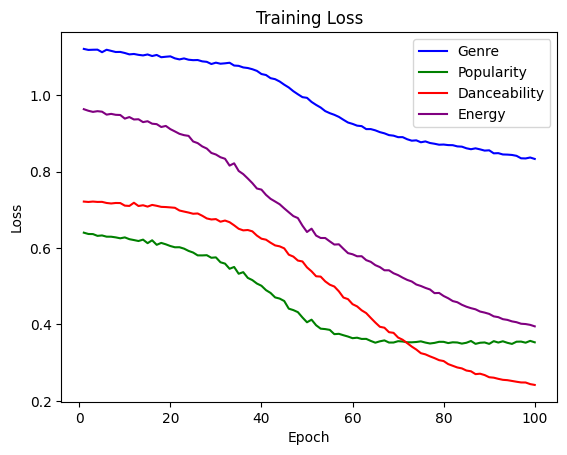

In [85]:
import matplotlib.pyplot as plt
epochs = range(1, 101)

plt.plot(epochs, losses_genre, label='Genre', color='blue')
plt.plot(epochs, losses_popularity, label='Popularity', color='green')
plt.plot(epochs, losses_danceability, label='Danceability', color='red')
plt.plot(epochs, losses_energy, label='Energy', color='purple')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Show the plot
plt.show()